Column names: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Model Evaluation Metrics:
Mean Absolute Error (MAE): 1265275.67
Mean Squared Error (MSE): 2750040479309.05
Root Mean Squared Error (RMSE): 1658324.60
R² Score: 0.46


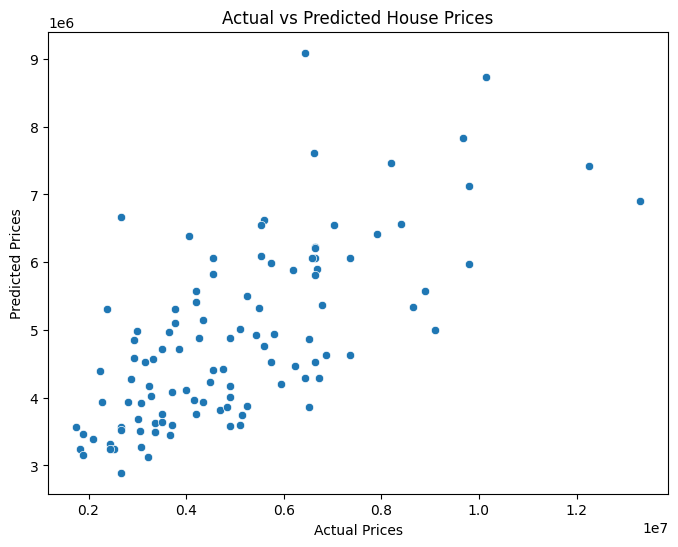


Sample of Actual vs Predicted Prices:
   Actual Price  Predicted Price
0       4060000     6.383168e+06
1       6650000     6.230250e+06
2       3710000     3.597885e+06
3       6440000     4.289731e+06
4       2800000     3.930446e+06
5       4900000     4.883933e+06
6       5250000     5.505773e+06
7       4543000     6.068793e+06
8       2450000     3.321512e+06
9       3353000     3.495158e+06

Predicted House Price for 2000 sqft, 3 bedrooms, 2 bathrooms: $4675650.79


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ Load the dataset
file_path = "/content/Housing.csv"  # Corrected file path
df = pd.read_csv(file_path)

# ✅ Print the actual column names in the dataset
print("Column names:", df.columns)

# ✅ Select relevant features
features = ["area", "bedrooms", "bathrooms"]  # Updated to match dataset
target = "price"  # Updated to match dataset

# ✅ Handle missing values
df = df[features + [target]].dropna()

# ✅ Split into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# ✅ Predict on test set
y_pred = model.predict(X_test)

# ✅ Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# ✅ Visualizing Predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# ✅ Compare actual vs predicted prices
comparison_df = pd.DataFrame({"Actual Price": y_test.values, "Predicted Price": y_pred})
print("\nSample of Actual vs Predicted Prices:")
print(comparison_df.head(10))  # Display first 10 comparisons

# ✅ Predict price for a new house (Example)
def predict_price(sqft, bedrooms, bathrooms):
    input_features = np.array([[sqft, bedrooms, bathrooms]])
    predicted_price = model.predict(input_features.reshape(1, -1))[0]
    return predicted_price

# Example usage:
predicted_price = predict_price(2000, 3, 2)
print(f"\nPredicted House Price for 2000 sqft, 3 bedrooms, 2 bathrooms: ${predicted_price:.2f}")


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'baseme

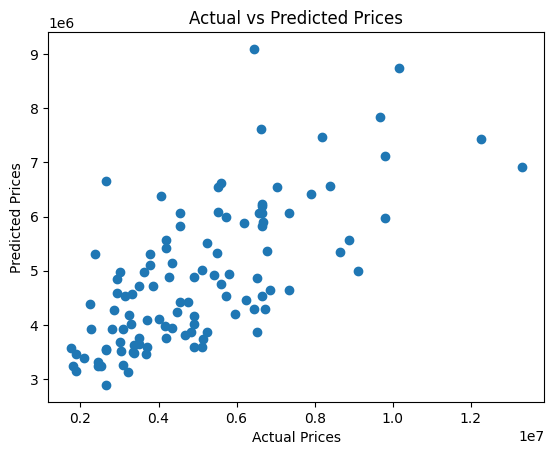

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset (replace 'house_data.csv' with your dataset path)
data = pd.read_csv('/content/Housing.csv')
# Display the first few rows of the dataset and check columns
print(data.head())
print(data.columns)
# Select features and target variable
X = data[[ 'area', 'bedrooms', 'bathrooms']] # Example features
y = data['price']  # Target variable
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a linear regression model
model = LinearRegression()
# Train the model using the training sets
model.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = model.predict(X_test)
# Print model coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plotting predicted vs actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()